In [1]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [2]:
def dist(p1,p2,eps):
    if np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 ) < eps:
        return 1
    else:
        return 0 
    
#function to make dbscan algorithm
def dbscan(data,eps,minpts):
    #Initializing labels as 0
    labels = np.zeros(len(data[:,0]))
    #Currently no point assigned in clusters
    curr_cl = 0
    #Start iteration over all data points
    for i in range(len(data[:,0])):
        #checking if point already visited or not
        if labels[i] != 0:
            continue
        #calling core to get all neighbours around the current core
        neighbours = core(data,i,eps)
        #condition to be a valid core point
        if len(neighbours)<minpts:
            #As condition failed so label as outlier for now(may be border point)
            labels[i] = -1
        #if condition is true then start assigning points to cluster
        else:
            curr_cl +=1
            #Calling cluster which will keep assigning points to the cluseter
            cluster(data,labels,i,neighbours,curr_cl,eps,minpts)
    #Returning labels of data containg cluster information
    return labels

def core(data,i,eps):
    neighbours = np.array([])
    #Obtaining all the neighbours of the core point using dist funtion
    for j in range(len(data[:,0])):
        if dist(data[i,:],data[j,:],eps) == 1:
            neighbours = np.append(neighbours,j)
    return(neighbours)

def cluster(data,labels,i,neighbours,curr_cl,eps,min_pts):
    #Asssign point to the same cluster as the core point 
    labels[i] = curr_cl
    j=0
    #Iterating to get the nearest neighbours
    while j < len(neighbours):
        p = int(neighbours[j])
        #If point was a border point then include it in the cluster
        if labels[p] == -1:
            labels[p] = curr_cl
        #if point not visited yet then find nearest neighbours considering it as a core point
        elif labels[p] == 0:
            labels[p] = curr_cl
            #Finding neighbours
            N_neighbours = core(data,p,eps)
            #Checking conditon for a core point
            if len(N_neighbours) >= min_pts:
                #If true then append neihbours as these points also lie in the cluster 
                neighbours = np.append(neighbours,N_neighbours) 
        j+=1

Automatically created module for IPython interactive environment
(1500, 2)
(1500, 2)
(1500, 2)
(1500, 2)
(1500, 2)
(1500, 2)


<Figure size 1512x936 with 0 Axes>

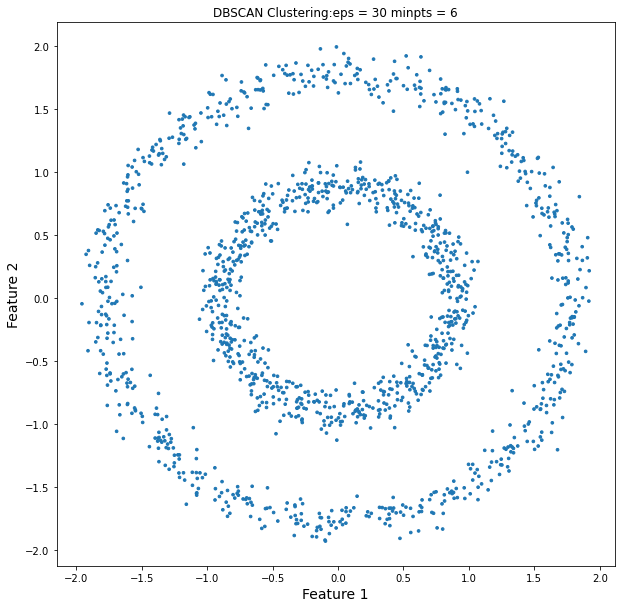

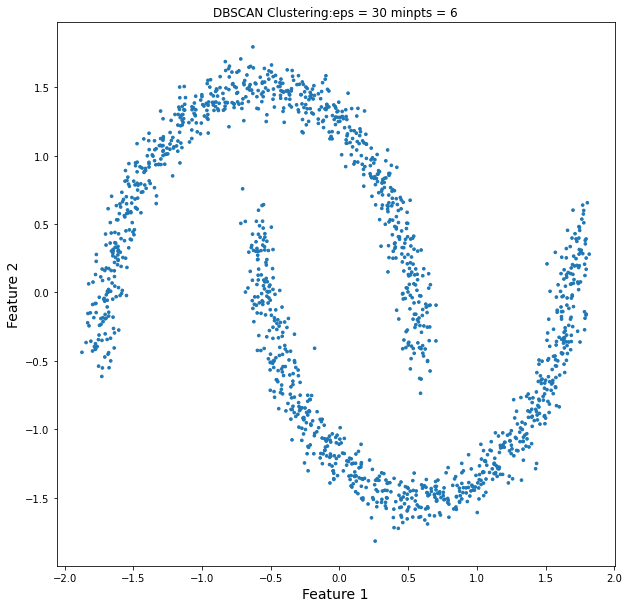

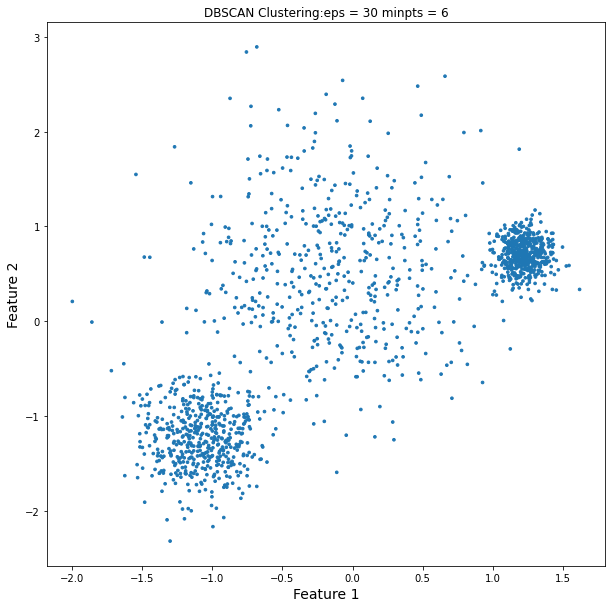

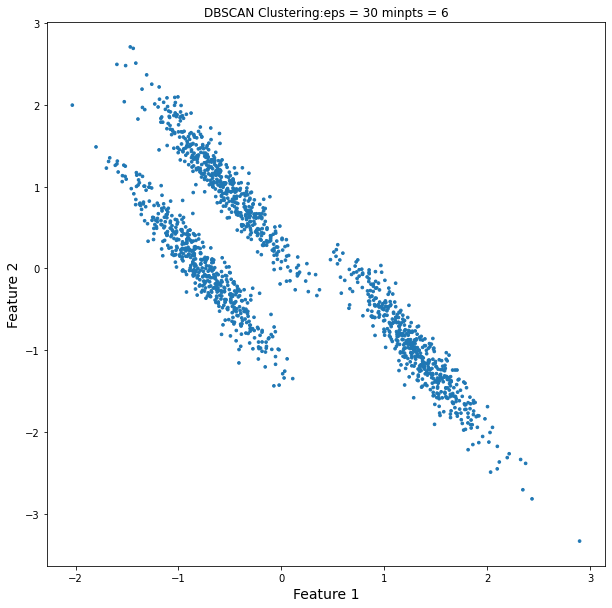

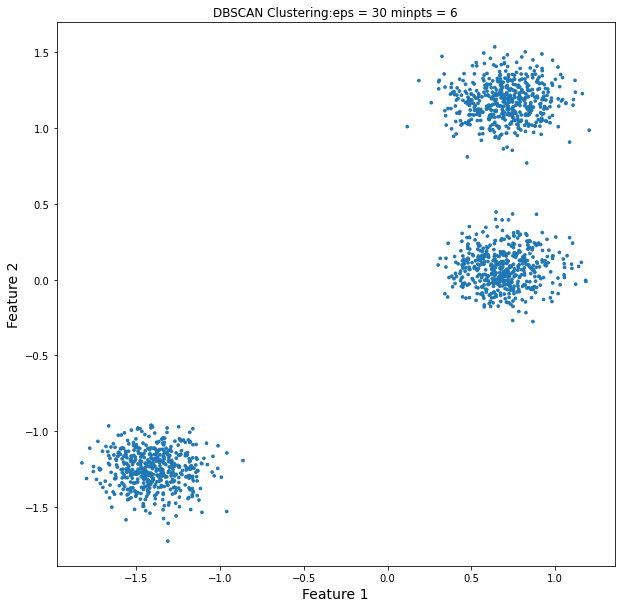

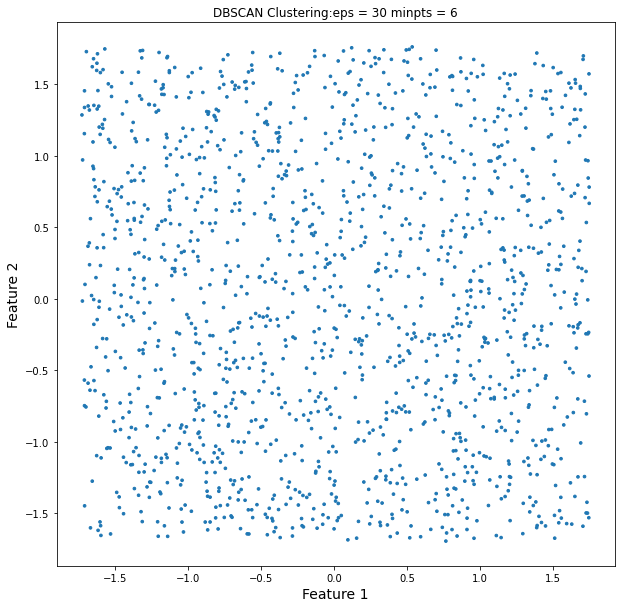

In [3]:
print(__doc__)



np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.95, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)
    
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    print(X.shape)
    clusters = dbscan(X,30,6)
    
    plt.figure(figsize=[10,10])
    plt.scatter(X[:,0],X[:,1],c= clusters,s=7,cmap = 'tab20')
    plt.title('DBSCAN Clustering:eps = 30 minpts = 6');
    plt.xlabel('Feature 1',fontsize=14);
    plt.ylabel('Feature 2',fontsize=14);